In [2]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def F1(model,X,Y) :
    Y_model =model.predict(X)
    f1_scor = f1_score(Y,Y_model)
    return(f1_scor)


def result_model(model,X,Y, mat = True):
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)

    if mat:
        # Matrice de confusion
        cm_model = confusion_matrix(Y, Y_model)
        plt.rcParams['figure.figsize'] = (5, 5)
        sns.heatmap(cm_model, annot = True)
        plt.title(str(model))
        plt.show()

    # return()

# CART

## Téléchargement des données

In [ ]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v1.csv")

In [3]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v1.csv")

## Pre-processing

On sépare la variable à expliquer des variables explicatives.

In [4]:
X = train.drop(columns='Response')
Y = train['Response']

Séparation train/test

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

## Implémentation

Nous n'allons pas rentrer dans le détail du tuning étant doné que nous verrons ensuite les random forest, nous allons donc simplement faire un appel pour voir les résultats que nous donne un arbre cart simple.

Le f1 score vaut 0.4225069078121076


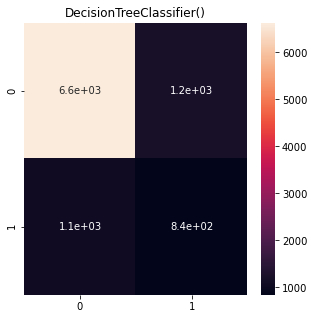

In [ ]:
rfc = tree.DecisionTreeClassifier()
rfc.fit(X_train, Y_train)
Y_rfc = result_model(rfc, X_test, Y_test)

In [ ]:
scores = cross_val_score(rfc, X, Y, cv=5, scoring='f1')
print("F1 moyen de %0.2f avec un écart type de %0.2f" % (scores.mean(), scores.std()))

F1 moyen de 0.43 avec un écart type de 0.01


## Conclusion

Nous avons de très bons résultats avec le CART, mais nous pouvons sans doute faire mieux !

<br><br><br><br>